In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import random
from pywaffle import Waffle
from matplotlib.offsetbox import AnchoredText
from tkinter import *
from tkinter.filedialog import askopenfilename

In [3]:
'''root=Tk()
root.withdraw()
readfile=askopenfilename(title='Choose Input .CSV File',initialdir='.\\')
print("[+] Checking: ", readfile)
if os.path.isfile(readfile):
    print("[+] {} exists - Checking Complete".format(readfile))
else:
    print("[-] {} does not exists. Exiting program".format(readfile))
    quit()'''

'root=Tk()\nroot.withdraw()\nreadfile=askopenfilename(title=\'Choose Input .CSV File\',initialdir=\'.\\\')\nprint("[+] Checking: ", readfile)\nif os.path.isfile(readfile):\n    print("[+] {} exists - Checking Complete".format(readfile))\nelse:\n    print("[-] {} does not exists. Exiting program".format(readfile))\n    quit()'

In [4]:
# df=pd.read_csv(readfile,'r')

In [5]:
df=pd.read_csv('health.csv')

In [6]:
def on_selection(value): # function for dropdown destroy
    global choice
    choice = value
    root.destroy()

In [7]:
x = list(df.select_dtypes(include=['float64','int64']).columns) # list for numeric columns
color_name = list(df.select_dtypes(include=['object']).columns) # list for string columns

In [8]:
root = Tk() # Dropdown for user interface for x variable
variable_x= StringVar(root)
variable_x.set(x[0])
popupMenu = OptionMenu(root, variable_x, *x, command=on_selection)
Label(root, text="Choose X Variable").grid(row=0, column=0)
popupMenu.grid(row=1, column =0)
root.mainloop()

In [9]:
x_axis=choice

In [10]:
root = Tk() # Dropdown for user interface for y variable
variable_y= StringVar(root)
variable_y.set(x[0])
popupMenu = OptionMenu(root, variable_y, *x, command=on_selection)
Label(root, text="Choose Y Variable").grid(row=0, column=0)
popupMenu.grid(row=1, column =0)
root.mainloop()

In [11]:
y_axis=choice

In [12]:
root = Tk() # Dropdown for user interface for colour
variable_color= StringVar(root)
variable_color.set(color_name[0])
popupMenu = OptionMenu(root, variable_color, *color_name, command=on_selection)
Label(root, text="Choose Variable for Colour").grid(row=0, column=0)
popupMenu.grid(row=1, column =0)
root.mainloop()

In [13]:
colour=choice

In [14]:
graph_type=['Single Parameter','Two Parameters','Complete Dataset'] # parameter number selection

In [15]:
root = Tk() # Dropdown for graph type user interface
variable_graph= StringVar(root)
variable_graph.set(graph_type[0])
popupMenu = OptionMenu(root, variable_graph, *graph_type, command=on_selection)
Label(root, text="Choose Graph Type").grid(row=0, column=0)
popupMenu.grid(row=1, column =0)
root.mainloop()

In [16]:
graph=choice

In [17]:
single_graph=['Bar Diagram','Histogram with Boxplot','Box and Whiskers','Violine Plot','Waffle Plot'] # plot type

In [18]:
two_par_graph=['Scatterplot','Bubble Plot','Scatterplot with best fit line','Scatterplot with best fit line classwise','Jittering with stripplot','Marginal Histogram','Marginal Boxplot'] # plot type

In [19]:
data_graph=['Correlogram','Pairwise plot','Box and Whiskers','Violine Plot','Pie Diagram'] # plot type

In [20]:
if graph=='Single Parameter': # User dropdown for graph parameter
    root = Tk()
    variable_type= StringVar(root)
    variable_type.set(single_graph[0])
    popupMenu = OptionMenu(root, variable_type, *single_graph, command=on_selection)
    Label(root, text="Choose Graph").grid(row=0, column=0)
    popupMenu.grid(row=1, column =0)
    root.mainloop()
elif graph=='Two Parameters':
    root = Tk()
    variable_type= StringVar(root)
    variable_type.set(two_par_graph[0])
    popupMenu = OptionMenu(root, variable_type, *two_par_graph, command=on_selection)
    Label(root, text="Choose Graph").grid(row=0, column=0)
    popupMenu.grid(row=1, column =0)
    root.mainloop()
elif graph=='Complete Dataset':
    root = Tk()
    variable_type= StringVar(root)
    variable_type.set(data_graph[0])
    popupMenu = OptionMenu(root, variable_type, *data_graph, command=on_selection)
    Label(root, text="Choose Graph").grid(row=0, column=0)
    popupMenu.grid(row=1, column =0)
    root.mainloop()

In [21]:
graph_type=choice

In [23]:
#scatterplot
def scatterplot():
    plt.figure(figsize=(12, 8), dpi= 80, edgecolor='black')
    ax1=sns.scatterplot(data=df, x=x_axis, y=y_axis,hue=colour)
    ax1.grid(True)
    #plt.legend(loc='upper right')
    plt.title('Scatterplot \n'+ x_axis+' vs '+y_axis)
    plt.show()

In [24]:
#Bubble plot
def bubbleplot():
    plt.figure(figsize=(12, 8), dpi= 80, edgecolor='black')
    ax2=sns.scatterplot(data=df, x=x_axis, y=y_axis,hue=bbl_size,size=bbl_size, sizes=(40, 200))
    ax2.grid(True)
    plt.legend(loc='upper left')
    plt.title('Bubbleplot \n'+ x_axis+' vs '+y_axis)
    plt.show()

In [25]:
#scatterplot with best fit line
def bestfit_scatter():
    plt.figure(figsize=(12, 8), dpi= 80, edgecolor='black')
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[x_axis],df[y_axis])
    ax3=sns.regplot(data=df, x=x_axis, y=y_axis,color='b',line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    ax3.grid(True)
    ax3.legend()
    plt.title('Scatterplot with best fit line \n'+ x_axis+' vs '+y_axis)
    plt.show()

In [26]:
#Scatterplot with best fit line classwise
def classwisescatter():
    sns.lmplot(data=df, x=x_axis, y=y_axis, hue=colour, col=colour, legend=True, legend_out=True,col_wrap=4, height=3)
    plt.show()

In [27]:
#Jittering with stripplot
def stripplot():
    fig, ax = plt.subplots(figsize=(12,8), dpi= 80) 
    ax3=sns.stripplot(data=df, x=x_axis, y=y_axis, jitter=0.25, size=8, ax=ax, linewidth=.5)
    ax3.grid(True)
    plt.title('Jitterplot \n'+ x_axis+' vs '+y_axis)
    plt.show()

In [28]:
#Marginal Histogram
def marginhist():
    fig, ax = plt.subplots(figsize=(12,8), dpi= 80)
    grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
    plt.axis('off')
    ax_main = fig.add_subplot(grid[:-1, :-1])
    ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
    ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
    ax_main.scatter(x_axis, y_axis, alpha=.9, data=df, color='b')
    ax_bottom.hist(df[x_axis], 40, histtype='stepfilled', orientation='vertical', color='b')
    ax_bottom.invert_yaxis()
    ax_right.hist(df[y_axis], 40, histtype='stepfilled', orientation='horizontal', color='b')
    ax_main.set(title='Scatterplot with Histograms \n '+ x_axis+' vs '+y_axis, xlabel=x_axis, ylabel=y_axis)
    plt.show()

In [29]:
#Marginal Boxplot
def marginbox():
    fig, ax = plt.subplots(figsize=(12,8), dpi= 80)
    grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
    plt.axis('off')
    ax_main = fig.add_subplot(grid[:-1, :-1])
    ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
    matplotlib.pyplot.boxplot(df[y_axis], vert=True)
    ax_right.set_xlabel(y_axis) # set label at the bottom of the boxplot
    ax_right.axes.xaxis.set_ticks([]) # remove x ticks
    ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
    matplotlib.pyplot.boxplot(df[x_axis], vert=False) 
    ax_bottom.set_ylabel(x_axis) # set label at the side of the boxplot
    plt.tick_params(bottom=False,top=True) # move ticks to top
    ax_bottom.axes.yaxis.set_ticks([])# remove y ticks
    ax_main.scatter(x_axis, y_axis, alpha=.9, data=df, color='g')
    ax_main.set(title='Scatterplot with Boxplots \n '+ x_axis+' vs '+y_axis, xlabel=x_axis, ylabel=y_axis)
    plt.show()

In [30]:
#Correlogram
def correlogram():
    plt.figure(figsize=(14,12), dpi= 80)
    sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
    plt.title('Correlogram')
    plt.xticks()
    plt.yticks()
    plt.show()

In [31]:
#Pairwise plot
def pairwise():
    plt.figure(figsize=(12,8), dpi= 80)
    sns.pairplot(df, kind="reg",corner=True)
    plt.show()

In [32]:
#Box and Whiskers
def boxnwhiskers(data=None):
    plt.figure(figsize=(13,10), dpi= 80)
    sns.boxplot(data=df[data], notch=False) if data else sns.boxplot(data=df, notch=False)
    plt.title('Box & Whiskers')
    plt.show()

In [33]:
# Violine Plot
def violine(data=None):
    plt.figure(figsize=(13,10), dpi= 80)
    sns.violinplot(data=df[data],scale='width',inner='quartile')if data else sns.violinplot(data=df,scale='width',inner='quartile')
    plt.title('Violin Plot')
    plt.show()

In [34]:
# Bar Diagram
def bar(axis):
    plt.figure(figsize=(12,8), dpi= 80)
    plt.bar(df[bar_name], df[axis], color ='maroon')
    plt.xticks(rotation=45)
    plt.title('Bar Chart \n'+axis)
    plt.show()

In [35]:
# Pie Diagram
def pie():
    df_mod = df.groupby(pie_gr).size()
    df_mod.plot(kind='pie', subplots=True, figsize=(12, 12))
    plt.ylabel("")
    plt.show()

In [36]:
# Waffle Chart
def waffle():
    df_waffle = df.groupby(waffle_gr).size().reset_index(name=waffle_no_gr)
    n_categories = df_waffle.shape[0]
    colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]
    fig = plt.figure(FigureClass=Waffle,plots={'111': {'values': df_waffle[waffle_no_gr],'labels': ["{0} ({1})".format(n[0], n[1]) for n in df_waffle[[waffle_gr, waffle_no_gr]].itertuples()],'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},'title': {'label': waffle_no_gr+' by '+waffle_gr, 'loc': 'center', 'fontsize':18}},},rows=7,colors=colors,figsize=(12, 8))
    plt.show()

In [37]:
# Histogram with Boxplot
def histbox(axis):
    sns.set(font_scale=1)
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10,6))
    sns.boxplot(df[axis], ax=ax_box2)
    sns.distplot(df[axis], ax=ax_hist2, bins=10)
    anchored_text = AnchoredText(str(df[axis].describe()), loc=2)
    ax_hist2.add_artist(anchored_text)
    ax_hist2.set(xlabel='Histogram')
    ax_box2.set(title='Box and Whiskers')
    plt.show()

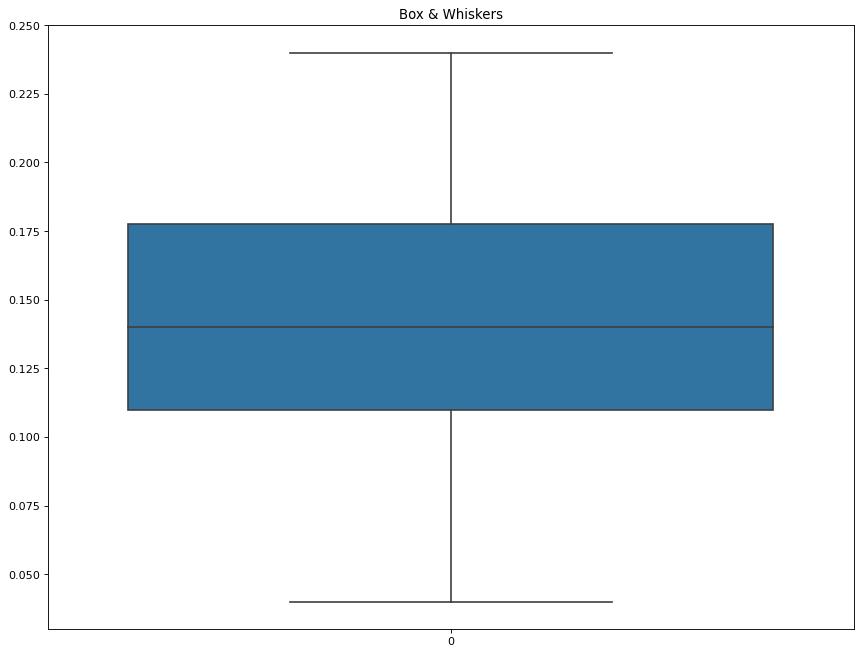

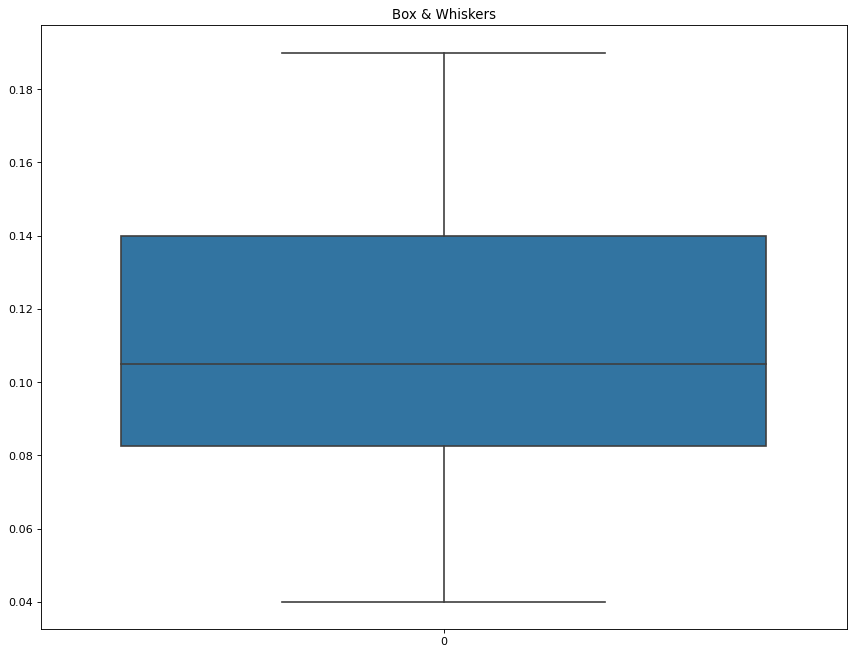

In [38]:
# Plotting graph
if graph_type=='Scatterplot':
    scatterplot()
elif graph_type=='Scatterplot with best fit line':
    bestfit_scatter()
elif graph_type=='Scatterplot with best fit line classwise':
    classwisescatter()
elif graph_type=='Jittering with stripplot':
    stripplot()
elif graph_type=='Marginal Histogram':
    marginhist()
elif graph_type=='Marginal Boxplot':
    marginbox()
elif graph_type=='Bubble Plot':
    bubble = list(df.select_dtypes(include=['float64','int64']).columns)
    root = Tk()
    bubble_size= StringVar(root)
    bubble_size.set(bubble[0])
    popupMenu = OptionMenu(root, bubble_size, *bubble, command=on_selection)
    Label(root, text="Choose Bubble Size").grid(row=0, column=0)
    popupMenu.grid(row=1, column =0)
    root.mainloop()
    bbl_size=choice
    bubbleplot()
elif graph_type=='Correlogram':
    correlogram()
elif graph_type=='Pairwise plot':
    pairwise()
elif graph_type=='Box and Whiskers':
    if graph=='Complete Dataset':
        boxnwhiskers()
    else:
        boxnwhiskers(x_axis)
        boxnwhiskers(y_axis)  
elif graph_type=='Violine Plot':
    if graph=='Complete Dataset':
        violine()
    else:
        violine(x_axis)
        violine(y_axis) 
elif graph_type=='Pie Diagram':
    pie_group = list(df.select_dtypes(include=['object']).columns)
    root = Tk()
    drdw_pie_gr = StringVar(root)
    drdw_pie_gr.set(pie_group[0])
    popupMenu = OptionMenu(root, drdw_pie_gr, *pie_group, command=on_selection)
    Label(root, text="Choose Pie Group").grid(row=0, column=0)
    popupMenu.grid(row=1, column =0)
    root.mainloop()
    pie_gr=choice
    pie()
elif graph_type=='Histogram with Boxplot':
    histbox(x_axis)
    histbox(y_axis)
elif graph_type=='Bar Diagram':
    bar_x_axis = list(df.select_dtypes(include=['object']).columns)
    root = Tk()
    drdw_bar_name = StringVar(root)
    drdw_bar_name.set(bar_x_axis[0])
    popupMenu = OptionMenu(root, drdw_bar_name, *bar_x_axis, command=on_selection)
    Label(root, text="Choose Bar Name").grid(row=0, column=0)
    popupMenu.grid(row=1, column =0)
    root.mainloop()
    bar_name=choice
    bar(x_axis)
    bar(y_axis)
elif graph_type=='Waffle Plot':
    waffle_group = list(df.select_dtypes(include=['object']).columns)
    root = Tk()
    drdw_waffle_gr = StringVar(root)
    drdw_waffle_gr.set(waffle_group[0])
    popupMenu = OptionMenu(root, drdw_waffle_gr, *waffle_group, command=on_selection)
    Label(root, text="Waffle group").grid(row=0, column=0)
    popupMenu.grid(row=1, column =0)
    root.mainloop()
    waffle_gr=choice
    waffle_no_group = list(df.select_dtypes(include=['float64','int64']).columns)
    root = Tk()
    drdw_waffle_no_gr = StringVar(root)
    drdw_waffle_no_gr.set(waffle_group[0])
    popupMenu = OptionMenu(root, drdw_waffle_no_gr, *waffle_no_group, command=on_selection)
    Label(root, text="Data").grid(row=0, column=0)
    popupMenu.grid(row=1, column =0)
    root.mainloop()
    waffle_no_gr=choice
    waffle()